In [1]:
import utils
import pickle as pkl
from art.utils import load_mnist
import run_test
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

(_,_),(x_test,y_true), _, _ = load_mnist()
#todo: in real attack we wont use 20 examples
x_test = x_test[:500]
y_true = y_true[:500]

<h1>MNIST initial experiment</h1>

In [2]:
# display accuracy

y_pred_beit = np.load("y_pred_Init_Beit_MNist.npy")
y_pred_vit = np.load("y_pred_Init_Vit_MNist.npy")
accuracy_beit = np.sum(np.argmax(y_pred_beit, axis=1) == np.argmax(y_true, axis=1)) / len(y_true)
accuracy_vit = np.sum(np.argmax(y_pred_vit, axis=1) == np.argmax(y_true, axis=1)) / len(y_true)

print("BEIT initial experiment accuracy: ", accuracy_beit)
print("ViT initial experiment accuracy: ", accuracy_vit)

BEIT initial experiment accuracy:  0.806
ViT initial experiment accuracy:  0.642


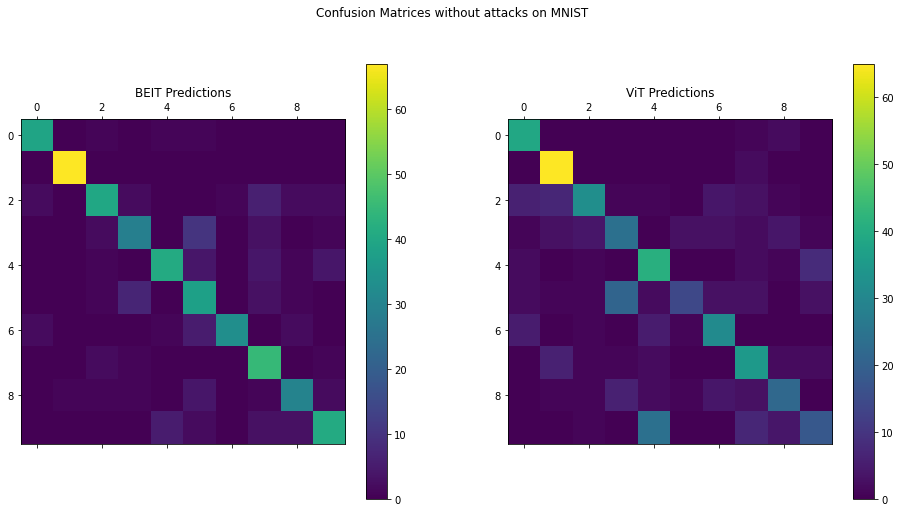

In [3]:
# draw confusion matrix

fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
fig.suptitle("Confusion Matrices without attacks on MNIST")
y_true_decoded = np.argmax(y_true, axis=1)
y_pred_beit_decoded = np.argmax(y_pred_beit, axis=1)
y_pred_vit_decoded = np.argmax(y_pred_vit, axis=1)
confusion_matrix_beit = metrics.confusion_matrix(y_true_decoded, y_pred_beit_decoded)
confusion_matrix_vit = metrics.confusion_matrix(y_true_decoded, y_pred_vit_decoded)
ax1, ax2 = axes

im1 = ax1.matshow(confusion_matrix_beit)
im2 = ax2.matshow(confusion_matrix_vit)

ax1.title.set_text("BEIT Predictions")
ax2.title.set_text("ViT Predictions")

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

In [4]:
# display f1-score

f1_score_beit = utils.f1_score(y_pred_beit_decoded, y_true_decoded)
f1_score_vit = utils.f1_score(y_pred_vit_decoded, y_true_decoded)

print("BEIT initial experiment f1-score: ", f1_score_beit)
print("ViT initial experiment f1-score: ", f1_score_vit)

BEIT initial experiment f1-score:  0.8073629580396574
ViT initial experiment f1-score:  0.6254798712277465


<h1>MNIST Experiments</h1>

In [5]:
y_pred_beit_pgd = np.argmax(np.load("y_pred_PGD_Beit_MNist.npy"), axis=1)
y_pred_beit_cw = np.argmax(np.load("y_pred_CW_Beit_MNist.npy"), axis=1)
y_pred_beit_zoo = np.argmax(np.load("y_pred_ZOO_Beit_MNist.npy"), axis=1)
y_pred_vit_pgd = np.argmax(np.load("y_pred_PGD_Vit_MNist.npy"), axis=1)
y_pred_vit_cw = np.argmax(np.load("y_pred_CW_Vit_MNist.npy"), axis=1)
y_pred_vit_zoo = np.argmax(np.load("y_pred_ZOO_Vit_MNist.npy"), axis=1)

accuracy_beit_pgd = np.sum(y_pred_beit_pgd == y_true_decoded) / len(y_true_decoded)
accuracy_beit_cw = np.sum(y_pred_beit_cw == y_true_decoded) / len(y_true_decoded)
accuracy_beit_zoo = np.sum(y_pred_beit_zoo == y_true_decoded) / len(y_true_decoded)
accuracy_vit_pgd = np.sum(y_pred_vit_pgd == y_true_decoded) / len(y_true_decoded)
accuracy_vit_cw = np.sum(y_pred_vit_cw == y_true_decoded) / len(y_true_decoded)
accuracy_vit_zoo = np.sum(y_pred_vit_zoo == y_true_decoded) / len(y_true_decoded)

In [6]:
# display accuracy

print("BEIT PGD accuracy on MNIST: ", accuracy_beit_pgd)
print("BEIT CW accuracy on MNIST: ", accuracy_beit_cw)
print("BEIT ZOO accuracy on MNIST: ", accuracy_beit_zoo)
print("ViT PGD accuracy on MNIST: ", accuracy_vit_pgd)
print("ViT CW accuracy on MNIST: ", accuracy_vit_cw)
print("ViT ZOO accuracy on MNIST: ", accuracy_vit_zoo)

BEIT PGD accuracy on MNIST:  0.058
BEIT CW accuracy on MNIST:  0.51
BEIT ZOO accuracy on MNIST:  0.64
ViT PGD accuracy on MNIST:  0.04
ViT CW accuracy on MNIST:  0.498
ViT ZOO accuracy on MNIST:  0.536


In [7]:
# draw bar chart with attacks

# pgd_data = [accuracy_beit_pgd, accuracy_vit_pgd]
# cw_data = [accuracy_beit_cw, accuracy_vit_cw]
# zoo_data = [accuracy_beit_zoo, accuracy_vit_zoo]
# x = ["BEIT", "ViT"]
# x_axis = np.arange(len(x))
# plt.bar(x_axis-0.2, pgd_data, 0.2, label="PGD")
# plt.bar(x_axis, cw_data, 0.2, label="C&W")
# plt.bar(x_axis+0.2, zoo_data, 0.2, label="ZOO")

# plt.xticks(x_axis, x)
# plt.xlabel("Models")
# plt.ylabel("Accuracy")
# plt.title("Model Accuracy with Attacks on MNIST")
# plt.legend()
# plt.show()

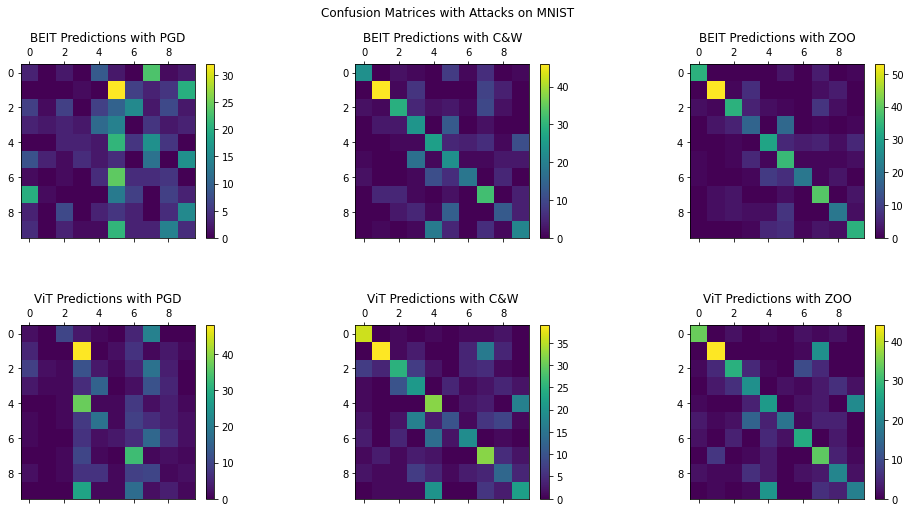

In [8]:
# draw confusion matrices

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle("Confusion Matrices with Attacks on MNIST")
plt.subplots_adjust(wspace=.5,hspace=.5)
confusion_matrix_beit_pgd = metrics.confusion_matrix(y_true_decoded, y_pred_beit_pgd)
confusion_matrix_beit_cw = metrics.confusion_matrix(y_true_decoded, y_pred_beit_cw)
confusion_matrix_beit_zoo = metrics.confusion_matrix(y_true_decoded, y_pred_beit_zoo)
confusion_matrix_vit_pgd = metrics.confusion_matrix(y_true_decoded, y_pred_vit_pgd)
confusion_matrix_vit_cw = metrics.confusion_matrix(y_true_decoded, y_pred_vit_cw)
confusion_matrix_vit_zoo = metrics.confusion_matrix(y_true_decoded, y_pred_vit_zoo)

im1 = ax1.matshow(confusion_matrix_beit_pgd)
im2 = ax2.matshow(confusion_matrix_beit_cw)
im3 = ax3.matshow(confusion_matrix_beit_zoo)
im4 = ax4.matshow(confusion_matrix_vit_pgd)
im5 = ax5.matshow(confusion_matrix_vit_cw)
im6 = ax6.matshow(confusion_matrix_vit_zoo)

ax1.title.set_text("BEIT Predictions with PGD")
ax2.title.set_text("BEIT Predictions with C&W")
ax3.title.set_text("BEIT Predictions with ZOO")
ax4.title.set_text("ViT Predictions with PGD")
ax5.title.set_text("ViT Predictions with C&W")
ax6.title.set_text("ViT Predictions with ZOO")

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)
fig.colorbar(im5, ax=ax5)
fig.colorbar(im6, ax=ax6)

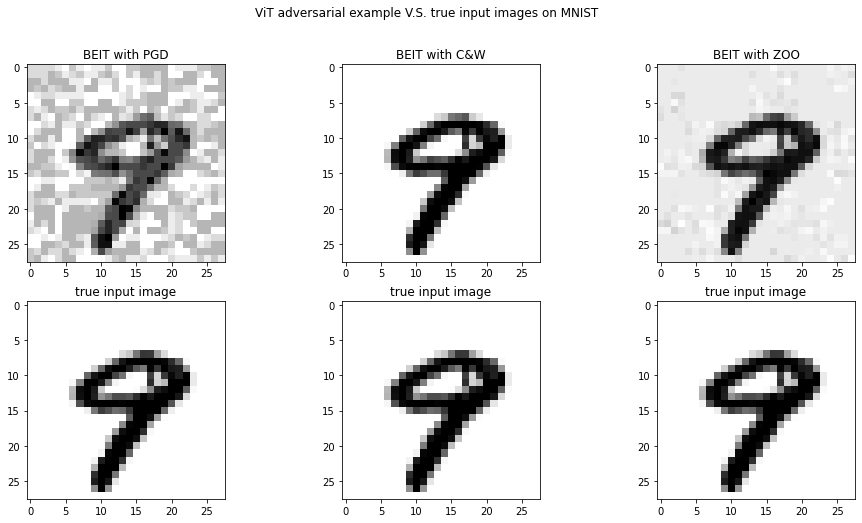

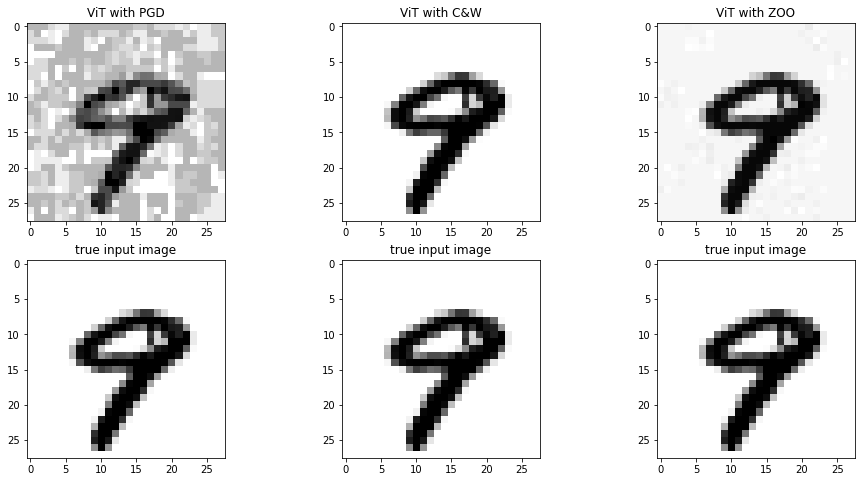

In [9]:
# display adversarial examples

# todo: in real test change this to 500
idx = np.random.randint(low=0, high=19)
im1 = np.transpose(pkl.load(open("Adv_Example_PGD_Beit_MNist.pkl", "rb"))[idx], (1, 2, 0))
im2 = np.transpose(pkl.load(open("Adv_Example_CW_Beit_MNist.pkl", "rb"))[idx], (1, 2, 0))
im3 = np.transpose(pkl.load(open("Adv_Example_ZOO_Beit_MNist.pkl", "rb"))[idx], (1, 2, 0))
im4 = np.transpose(pkl.load(open("Adv_Example_PGD_Vit_MNist.pkl", "rb"))[idx], (1, 2, 0))
im5 = np.transpose(pkl.load(open("Adv_Example_CW_Vit_MNist.pkl", "rb"))[idx], (1, 2, 0))
im6 = np.transpose(pkl.load(open("Adv_Example_ZOO_Vit_MNist.pkl", "rb"))[idx], (1, 2, 0))

im_beit_t = x_test[idx]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle("BEIT adversarial example V.S. true input images on MNIST")
ax1.title.set_text("BEIT with PGD")
ax2.title.set_text("BEIT with C&W")
ax3.title.set_text("BEIT with ZOO")
ax4.title.set_text("true input image")
ax5.title.set_text("true input image")
ax6.title.set_text("true input image")
ax1.imshow(im1, cmap=plt.cm.binary)
ax2.imshow(im2, cmap=plt.cm.binary)
ax3.imshow(im3, cmap=plt.cm.binary)
ax4.imshow(im_beit_t, cmap=plt.cm.binary)
ax5.imshow(im_beit_t, cmap=plt.cm.binary)
ax6.imshow(im_beit_t, cmap=plt.cm.binary)

fig2, ((ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle("ViT adversarial example V.S. true input images on MNIST")
ax7.title.set_text("ViT with PGD")
ax8.title.set_text("ViT with C&W")
ax9.title.set_text("ViT with ZOO")
ax10.title.set_text("true input image")
ax11.title.set_text("true input image")
ax12.title.set_text("true input image")
ax7.imshow(im4, cmap=plt.cm.binary)
ax8.imshow(im5, cmap=plt.cm.binary)
ax9.imshow(im6, cmap=plt.cm.binary)
ax10.imshow(im_beit_t, cmap=plt.cm.binary)
ax11.imshow(im_beit_t, cmap=plt.cm.binary)
ax12.imshow(im_beit_t, cmap=plt.cm.binary)

In [10]:
f1_score_beit_pgd = utils.f1_score(y_pred_beit_pgd, y_true_decoded)
f1_score_beit_cw = utils.f1_score(y_pred_beit_cw, y_true_decoded)
f1_score_beit_zoo = utils.f1_score(y_pred_beit_zoo, y_true_decoded)
f1_score_vit_pgd = utils.f1_score(y_pred_vit_pgd, y_true_decoded)
f1_score_vit_cw = utils.f1_score(y_pred_vit_cw, y_true_decoded)
f1_score_vit_zoo = utils.f1_score(y_pred_vit_zoo, y_true_decoded)

print("BEIT f1-scores (PGD, C&W, ZOO): ", f1_score_beit_pgd, f1_score_beit_cw, f1_score_beit_zoo)
print("ViT f1-scores (PGD, C&W, ZOO): ", f1_score_vit_pgd, f1_score_vit_cw, f1_score_vit_zoo)


BEIT f1-scores (PGD, C&W, ZOO):  0.05968331625832242 0.5190648962147857 0.6432792049097613
ViT f1-scores (PGD, C&W, ZOO):  0.0329887610232237 0.49288011960143147 0.5364613031650841


<h1>ILSVRC2012 Initial Experiments</h1>

In [11]:
y_pred_beit = np.load("y_pred_Initial_beit_base_patch16_224_Imagenet.npy")
y_pred_vit = np.load("y_pred_Initial_vit_base_patch16_224_Imagenet.npy")

#todo: in real test use 500 instead of 20
y_true = np.load("data/validation/y_val.npy")[:500]

accuracy_beit = np.sum(np.argmax(y_pred_beit, axis=1) == y_true) / len(y_true)
accuracy_vit = np.sum(np.argmax(y_pred_vit, axis=1) == y_true) / len(y_true)

In [12]:
# display accuracy

print("BEIT initial experiment accuracy: ", accuracy_beit)
print("ViT initial experiment accuracy: ", accuracy_vit)

BEIT initial experiment accuracy:  0.82
ViT initial experiment accuracy:  0.844


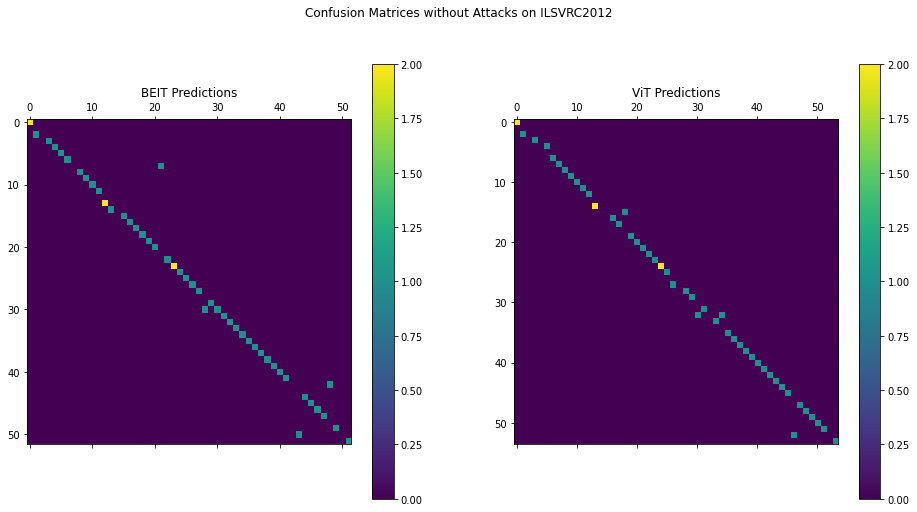

In [13]:
# draw confusion matrix

fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
fig.suptitle("Confusion Matrices without Attacks on ILSVRC2012")
y_pred_beit_decoded = np.argmax(y_pred_beit, axis=1)
y_pred_vit_decoded = np.argmax(y_pred_vit, axis=1)
confusion_matrix_beit = metrics.confusion_matrix(y_true[:50], y_pred_beit_decoded[:50])
confusion_matrix_vit = metrics.confusion_matrix(y_true[:50], y_pred_vit_decoded[:50])
ax1, ax2 = axes

im1 = ax1.matshow(confusion_matrix_beit)
im2 = ax2.matshow(confusion_matrix_vit)

ax1.title.set_text("BEIT Predictions")
ax2.title.set_text("ViT Predictions")

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

In [14]:
# draw bar chart for f1-score

f1_score_beit = utils.f1_score(y_pred_beit_decoded, y_true)
f1_score_vit = utils.f1_score(y_pred_vit_decoded, y_true)
# fig, ax1 = plt.subplots()
# fig.suptitle('Model F1-score Without Attacks on ILSVRC2012')
# ax1.bar(["BEIT", "ViT"], [f1_score_beit, f1_score_vit])

c:\users\cheng\pycharmprojects\finalproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cheng\pycharmprojects\finalproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cheng\pycharmprojects\finalproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\use

In [15]:
# display f1-score

print("BEIT initial experiment f1-score: ", f1_score_beit)
print("ViT initial experiment f1-score: ", f1_score_vit)

BEIT initial experiment f1-score:  0.8240761904761905
ViT initial experiment f1-score:  0.8378095238095239


<h1>ILSVRC2012 Experiments</h1>

In [16]:
y_pred_beit_pgd = np.argmax(np.load("y_pred_PGD_beit_base_patch16_224_Imagenet.npy"), axis=1)
y_pred_beit_cw = np.argmax(np.load("y_pred_CW_beit_base_patch16_224_Imagenet.npy"), axis=1)
y_pred_beit_zoo = np.argmax(np.load("y_pred_ZOO_beit_base_patch16_224_Imagenet.npy"), axis=1)
y_pred_vit_pgd = np.argmax(np.load("y_pred_PGD_vit_base_patch16_224_Imagenet.npy"), axis=1)
y_pred_vit_cw = np.argmax(np.load("y_pred_CW_vit_base_patch16_224_Imagenet.npy"), axis=1)
y_pred_vit_zoo = np.argmax(np.load("y_pred_ZOO_vit_base_patch16_224_Imagenet.npy"), axis=1)

# in real test use 500 instead of 20
y_true_imagenet = np.load("data/validation/y_val.npy")[:500]

# in real test remove this, this is because zoo test has not been implemented
# y_true_imagenet_zoo = np.load("data/validation/y_val.npy")[:20]

accuracy_beit_pgd = np.sum(y_pred_beit_pgd == y_true_imagenet) / len(y_true_imagenet)
accuracy_beit_cw = np.sum(y_pred_beit_cw == y_true_imagenet) / len(y_true_imagenet)
accuracy_beit_zoo = np.sum(y_pred_beit_zoo == y_true_imagenet) / len(y_true_imagenet)
accuracy_vit_pgd = np.sum(y_pred_vit_pgd == y_true_imagenet) / len(y_true_imagenet)
accuracy_vit_cw = np.sum(y_pred_vit_cw == y_true_imagenet) / len(y_true_imagenet)
accuracy_vit_zoo = np.sum(y_pred_vit_zoo == y_true_imagenet) / len(y_true_imagenet)

In [17]:
# display accuracy

print("BEIT PGD accuracy on ILSVRC2012: ", accuracy_beit_pgd)
print("BEIT CW accuracy on ILSVRC2012: ", accuracy_beit_cw)
print("BEIT ZOO accuracy on ILSVRC2012: ", accuracy_beit_zoo)
print("ViT PGD accuracy on ILSVRC2012: ", accuracy_vit_pgd)
print("ViT CW accuracy on ILSVRC2012: ", accuracy_vit_cw)
print("ViT ZOO accuracy on ILSVRC2012: ", accuracy_vit_zoo)

BEIT PGD accuracy on ILSVRC2012:  0.0
BEIT CW accuracy on ILSVRC2012:  0.126
BEIT ZOO accuracy on ILSVRC2012:  0.816
ViT PGD accuracy on ILSVRC2012:  0.012
ViT CW accuracy on ILSVRC2012:  0.104
ViT ZOO accuracy on ILSVRC2012:  0.826


In [18]:
# draw bar chart with attacks

# pgd_data = [accuracy_beit_pgd, accuracy_vit_pgd]
# cw_data = [accuracy_beit_cw, accuracy_vit_cw]
# zoo_data = [accuracy_beit_zoo, accuracy_vit_zoo]
# x = ["BEIT", "ViT"]
# x_axis = np.arange(len(x))
# plt.bar(x_axis-0.2, pgd_data, 0.2, label="PGD")
# plt.bar(x_axis, cw_data, 0.2, label="C&W")
# plt.bar(x_axis+0.2, zoo_data, 0.2, label="ZOO")

# plt.xticks(x_axis, x)
# plt.xlabel("Models")
# plt.ylabel("Accuracy")
# plt.title("Model Accuracy with Attacks on ILSVRC2012")
# plt.legend()
# plt.show()

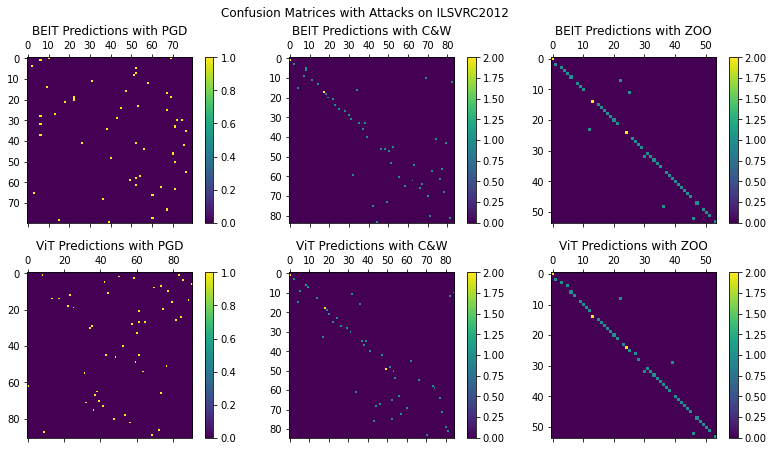

In [19]:
# draw confusion matrices

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))
fig.suptitle("Confusion Matrices with Attacks on ILSVRC2012")
# plt.subplots_adjust(wspace=.5,hspace=.5)


plt.subplots_adjust(wspace=0.02, hspace=0.3)

confusion_matrix_beit_pgd = metrics.confusion_matrix(y_true_imagenet[:50], y_pred_beit_pgd[:50])
confusion_matrix_beit_cw = metrics.confusion_matrix(y_true_imagenet[:50], y_pred_beit_cw[:50])
confusion_matrix_beit_zoo = metrics.confusion_matrix(y_true_imagenet[:50], y_pred_beit_zoo[:50])
confusion_matrix_vit_pgd = metrics.confusion_matrix(y_true_imagenet[:50], y_pred_vit_pgd[:50])
confusion_matrix_vit_cw = metrics.confusion_matrix(y_true_imagenet[:50], y_pred_vit_cw[:50])
confusion_matrix_vit_zoo = metrics.confusion_matrix(y_true_imagenet[:50], y_pred_vit_zoo[:50])

im1 = ax1.matshow(confusion_matrix_beit_pgd)
im2 = ax2.matshow(confusion_matrix_beit_cw)
im3 = ax3.matshow(confusion_matrix_beit_zoo)
im4 = ax4.matshow(confusion_matrix_vit_pgd)
im5 = ax5.matshow(confusion_matrix_vit_cw)
im6 = ax6.matshow(confusion_matrix_vit_zoo)

ax1.title.set_text("BEIT Predictions with PGD")
ax2.title.set_text("BEIT Predictions with C&W")
ax3.title.set_text("BEIT Predictions with ZOO")
ax4.title.set_text("ViT Predictions with PGD")
ax5.title.set_text("ViT Predictions with C&W")
ax6.title.set_text("ViT Predictions with ZOO")

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)
fig.colorbar(im5, ax=ax5)
fig.colorbar(im6, ax=ax6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

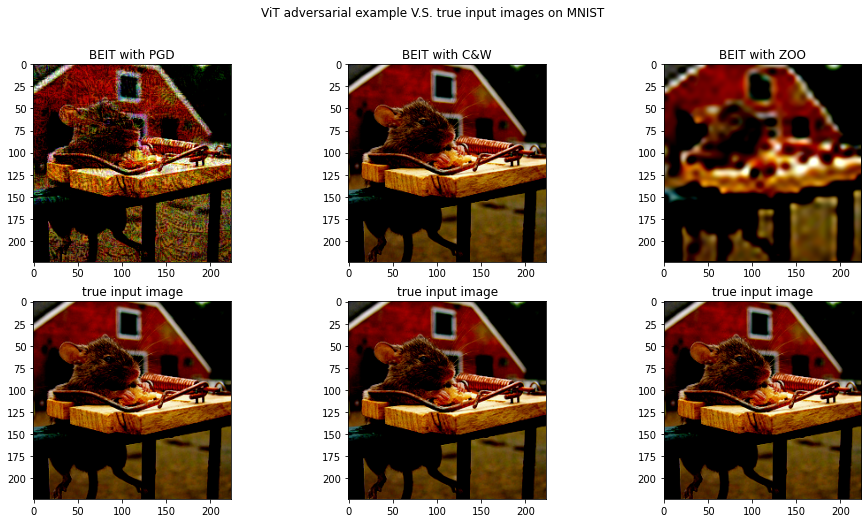

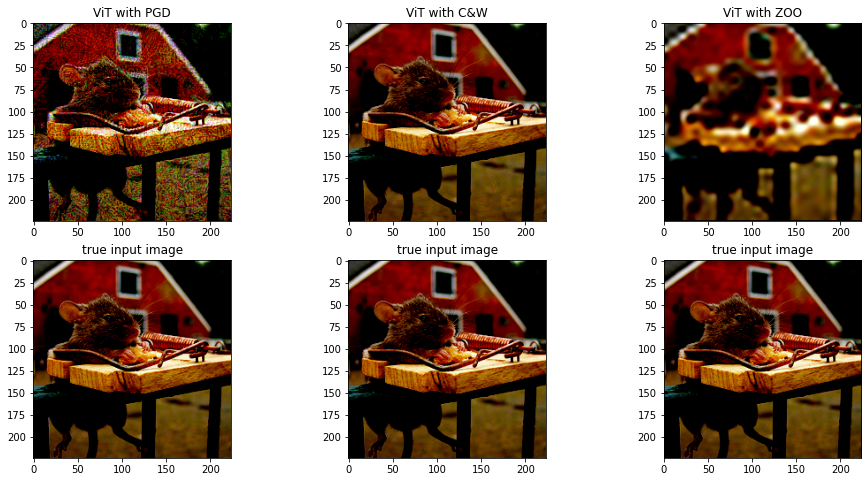

In [20]:
# display adversarial examples

# todo: in real test change this to 500
batch_idx = np.random.randint(low=1, high=5)
idx = np.random.randint(low=0, high=3)
im1 = np.transpose(np.load("data/validation/beit_base_patch16_224_pgd_Imagenet/x_val_{}.npy".format(batch_idx))[idx], (1, 2, 0))
im2 = np.transpose(np.load("data/validation/beit_base_patch16_224_cw_Imagenet/x_val_{}.npy".format(batch_idx))[idx], (1, 2, 0))
im3 = np.transpose(np.load("data/validation/beit_base_patch16_224_zoo_Imagenet/x_val_{}.npy".format(batch_idx))[idx], (1, 2, 0))
im4 = np.transpose(np.load("data/validation/vit_base_patch16_224_pgd_Imagenet/x_val_{}.npy".format(batch_idx))[idx], (1, 2, 0))
im5 = np.transpose(np.load("data/validation/vit_base_patch16_224_cw_Imagenet/x_val_{}.npy".format(batch_idx))[idx], (1, 2, 0))
im6 = np.transpose(np.load("data/validation/vit_base_patch16_224_zoo_Imagenet/x_val_{}.npy".format(batch_idx))[idx], (1, 2, 0))

im_beit_t = np.transpose(np.load("data/validation/vit_base_patch16_224_initial/x_val_{}.npy".format(batch_idx))[idx], (1, 2, 0))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle("BEIT adversarial example V.S. true input images on MNIST")
ax1.title.set_text("BEIT with PGD")
ax2.title.set_text("BEIT with C&W")
ax3.title.set_text("BEIT with ZOO")
ax4.title.set_text("true input image")
ax5.title.set_text("true input image")
ax6.title.set_text("true input image")
ax1.imshow(im1, cmap=plt.cm.binary)
ax2.imshow(im2, cmap=plt.cm.binary)
ax3.imshow(im3, cmap=plt.cm.binary)
ax4.imshow(im_beit_t, cmap=plt.cm.binary)
ax5.imshow(im_beit_t, cmap=plt.cm.binary)
ax6.imshow(im_beit_t, cmap=plt.cm.binary)

fig2, ((ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle("ViT adversarial example V.S. true input images on MNIST")
ax7.title.set_text("ViT with PGD")
ax8.title.set_text("ViT with C&W")
ax9.title.set_text("ViT with ZOO")
ax10.title.set_text("true input image")
ax11.title.set_text("true input image")
ax12.title.set_text("true input image")
ax7.imshow(im4, cmap=plt.cm.binary)
ax8.imshow(im5, cmap=plt.cm.binary)
ax9.imshow(im6, cmap=plt.cm.binary)
ax10.imshow(im_beit_t, cmap=plt.cm.binary)
ax11.imshow(im_beit_t, cmap=plt.cm.binary)
ax12.imshow(im_beit_t, cmap=plt.cm.binary)

In [21]:
# draw f1-score figures

f1_score_beit_pgd = utils.f1_score(y_pred_beit_pgd, y_true_imagenet)
f1_score_beit_cw = utils.f1_score(y_pred_beit_cw, y_true_imagenet)
f1_score_beit_zoo = utils.f1_score(y_pred_beit_zoo, y_true_imagenet)
f1_score_vit_pgd = utils.f1_score(y_pred_vit_pgd, y_true_imagenet)
f1_score_vit_cw = utils.f1_score(y_pred_vit_cw, y_true_imagenet)
f1_score_vit_zoo = utils.f1_score(y_pred_vit_zoo, y_true_imagenet)

c:\users\cheng\pycharmprojects\finalproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cheng\pycharmprojects\finalproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\cheng\pycharmprojects\finalproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\use

In [22]:
print("BEIT f1-scores (PGD, C&W, ZOO): ", f1_score_beit_pgd, f1_score_beit_cw, f1_score_beit_zoo)
print("ViT f1-scores (PGD, C&W, ZOO): ", f1_score_vit_pgd, f1_score_vit_cw, f1_score_vit_zoo)


BEIT f1-scores (PGD, C&W, ZOO):  0.0 0.12779999999999997 0.8171428571428571
ViT f1-scores (PGD, C&W, ZOO):  0.012 0.10293333333333334 0.8214666666666667


<h1>Drawing Loss Values</h1>

In [23]:
# loading necessary data
y_loss_pgd_beit_mnist = np.load("loss_value_pgd_beit_MNIST.npy")
y_loss_cw_beit_mnist = np.load("loss_value_cw_beit_MNIST.npy")
y_loss_zoo_beit_mnist = np.load("loss_value_zoo_beit_MNIST.npy")
y_loss_pgd_vit_mnist = np.load("loss_value_pgd_vit_MNIST.npy")
y_loss_cw_vit_mnist = np.load("loss_value_cw_vit_MNIST.npy")
y_loss_zoo_vit_mnist = np.load("loss_value_zoo_vit_MNIST.npy")

y_loss_pgd_beit_imagenet = np.load("loss_value_pgd_beit_base_patch16_224_Imagenet.npy")
y_loss_cw_beit_imagenet = np.load("loss_value_cw_beit_base_patch16_224_Imagenet.npy")
y_loss_zoo_beit_imagenet = np.load("loss_value_zoo_beit_base_patch16_224_Imagenet.npy")
y_loss_pgd_vit_imagenet = np.load("loss_value_pgd_vit_base_patch16_224_Imagenet.npy")
y_loss_cw_vit_imagenet = np.load("loss_value_cw_vit_base_patch16_224_Imagenet.npy")
y_loss_zoo_vit_imagenet = np.load("loss_value_zoo_vit_base_patch16_224_Imagenet.npy")

x_temp = np.arange(100)
x_temp_zoo = np.arange(11)

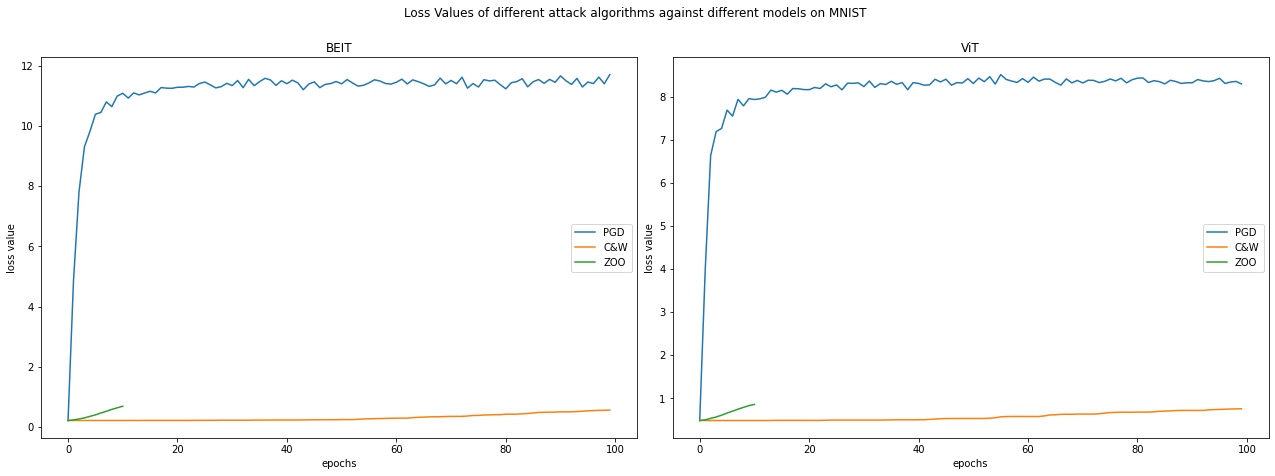

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))
fig.suptitle("Loss Values of different attack algorithms against different models on MNIST")

plt.subplots_adjust(wspace=0.06, hspace=0.2)

ax1.title.set_text("BEIT")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss value")
ax1.plot(x_temp, y_loss_pgd_beit_mnist, label="PGD")
ax1.plot(x_temp, y_loss_cw_beit_mnist, label="C&W")
ax1.plot(x_temp_zoo, y_loss_zoo_beit_mnist, label="ZOO")
ax1.legend()

ax2.title.set_text("ViT")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss value")
ax2.plot(x_temp, y_loss_pgd_vit_mnist, label="PGD")
ax2.plot(x_temp, y_loss_cw_vit_mnist, label="C&W")
ax2.plot(x_temp_zoo, y_loss_zoo_vit_mnist, label="ZOO")
ax2.legend()

plt.show()

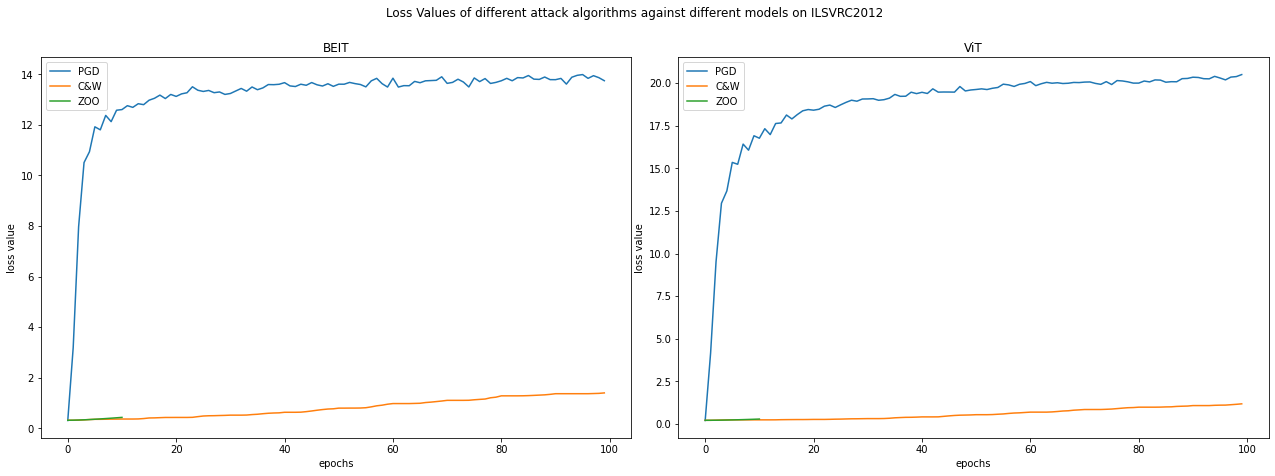

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))
fig.suptitle("Loss Values of different attack algorithms against different models on ILSVRC2012")

plt.subplots_adjust(wspace=0.08, hspace=0.2)

ax1.title.set_text("BEIT")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss value")
ax1.plot(x_temp, y_loss_pgd_beit_imagenet, label="PGD")
ax1.plot(x_temp, y_loss_cw_beit_imagenet, label="C&W")
ax1.plot(x_temp_zoo, y_loss_zoo_beit_imagenet, label="ZOO")
ax1.legend()

ax2.title.set_text("ViT")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss value")
ax2.plot(x_temp, y_loss_pgd_vit_imagenet, label="PGD")
ax2.plot(x_temp, y_loss_cw_vit_imagenet, label="C&W")
ax2.plot(x_temp_zoo, y_loss_zoo_vit_imagenet, label="ZOO")
ax2.legend()

plt.show()

In [26]:
from numpy import gradient, mean

print("All results are mean values")
print("beit gradients: ")

print("ILSVRC2012:")
print("pgd: ",mean(gradient(y_loss_pgd_beit_imagenet)))
print("c&w: ",mean(gradient(y_loss_cw_beit_imagenet)))
print("zoo: ",mean(gradient(y_loss_zoo_beit_imagenet)))

print("MNIST:")
print("pgd: ",mean(gradient(y_loss_pgd_beit_mnist)))
print("c&w: ",mean(gradient(y_loss_cw_beit_mnist)))
print("zoo: ",mean(gradient(y_loss_zoo_beit_mnist)))

print("vit gradients: ")

print("ILSVRC2012:")
print("pgd: ",mean(gradient(y_loss_pgd_vit_imagenet)))
print("c&w: ",mean(gradient(y_loss_cw_vit_imagenet)))
print("zoo: ",mean(gradient(y_loss_zoo_vit_imagenet)))

print("MNIST")
print("pgd: ",mean(gradient(y_loss_pgd_vit_mnist)))
print("c&w: ",mean(gradient(y_loss_cw_vit_mnist)))
print("zoo: ",mean(gradient(y_loss_zoo_vit_mnist)))

All results are mean values
beit gradients: 
ILSVRC2012:
pgd:  0.14818259
c&w:  0.0108989
zoo:  0.011187086
MNIST:
pgd:  0.13967803
c&w:  0.0034856063
zoo:  0.046321686
vit gradients: 
ILSVRC2012:
pgd:  0.2232308
c&w:  0.00979542
zoo:  0.0072463336
MNIST
pgd:  0.09521161
c&w:  0.0027334548
zoo:  0.03580834


<h1>Show Class Distributions</h1>

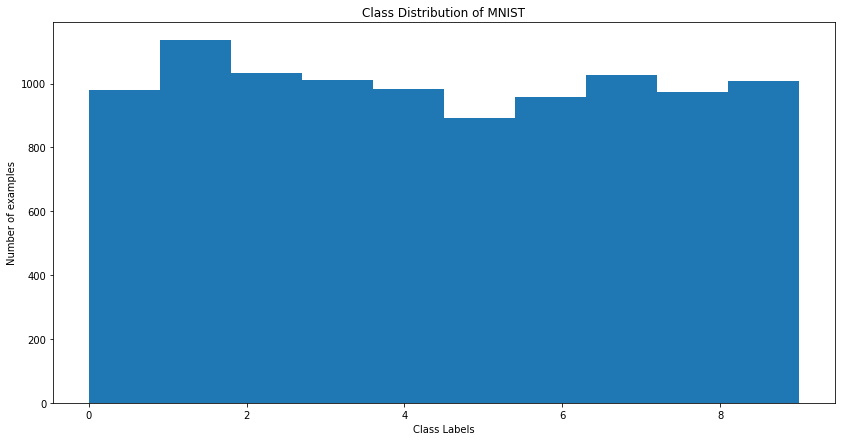

In [27]:
(_,_),(_,y_true), _, _ = load_mnist()
y_true_decoded = np.argmax(y_true, axis=1)
plt.figure(figsize=(14,7))
plt.title("Class Distribution of MNIST")
plt.xlabel("Class Labels")
plt.ylabel("Number of examples")
plt.hist(y_true_decoded, bins=10)
plt.show()

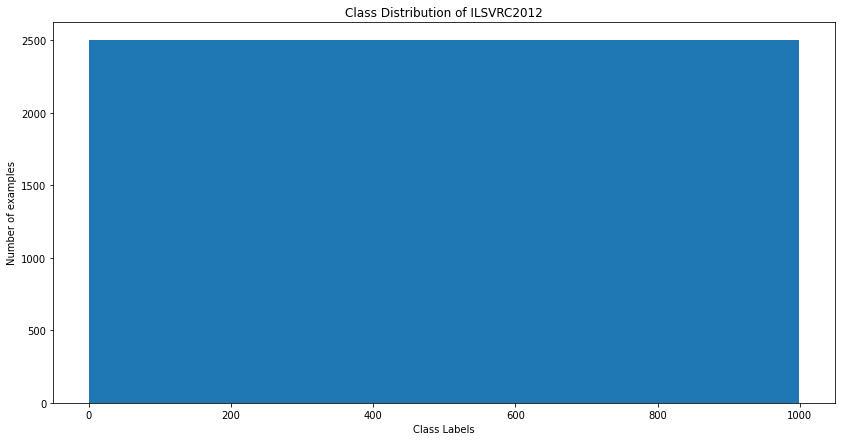

In [28]:
y_true = np.load("data/validation/y_val.npy")
plt.figure(figsize=(14,7))
plt.title("Class Distribution of ILSVRC2012")
plt.xlabel("Class Labels")
plt.ylabel("Number of examples")
plt.hist(y_true, bins=20)
plt.show()